### CITS5508 labsheet 5

Sample code showing how to read the CIFAR-10 data. Only cells 1 and 2 are needed. **Note: For the code to work, all the data batch files should be in the same directory with this Notebook file.**

This is only an example. Students should put in their own markdown cells. 

Rather than looking at the code in the file **<i>data_loader.py</i>**, description about the `DataLoader` class in the file can be viewed using **<i>pydoc</i>**. Try typing the following command in a terminal window (assuming that *data_loader.py* is in the current directory):<br>
<tt>
&nbsp; &nbsp; pydoc data_loader
</tt>

To convert this file into **<i>lab05-sample.py</i>**, a Python script file, for running on **Kaya** (the UWA GPU computer), do the following:
* If you are using Jupyter-lab, then select **File $>$ Export Notebook As... $>$ Executable Script $>$**. In the popped up window, select **Save File** and click the **OK** button.
* If you are using **Jupyter-notebook**, then select **File $>$ Download as $>$ Python (.py)**. Note that the option **Python (.py)** might be hidden. You would need to scroll down the list to see it. In the popped up window, select **Save File** and click the **OK** button.

**Author: Du Huynh**<br>
**Date: April 2021**

#### Step 1: Import the `DataLoader` class

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import sys
os.chdir('drive/MyDrive/ColabNotebooks')

In [3]:
from data_loader import DataLoader
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


#### Step 2: Call the `load_batch` function

#### Step 3. A quick inspection of the outputs from the `load_batch` function

In [4]:
# You need to split the training set to form a validation set. The original
# training set would become smaller.

In [5]:
# According to the CIFAR-10 website, the training set is split into five batches
# stored in fives files. Each colour image has dimensions equal to 32 x 32 x 3. There
# are 10 classes.
image_width, image_height, image_Nchannels = 32, 32, 3
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# The default values of all the arguments of the load_batch function have been
# set for the CIFAR-10 dataset.
X_ori, y_ori = DataLoader.load_batch('data_batch')
X_test, y_test = DataLoader.load_batch('test_batch', Nbatches=1)

In [6]:
print('X_test.shape =', X_ori.shape, 'data type:', X_ori.dtype)
print('y_test.shape =', y_ori.shape, 'data type:', y_ori.dtype)

X_test.shape = (50000, 32, 32, 3) data type: float32
y_test.shape = (50000,) data type: uint8


In [7]:
print('X_test.shape =', X_test.shape, 'data type:', X_test.dtype)
print('y_test.shape =', y_test.shape, 'data type:', y_test.dtype)

X_test.shape = (10000, 32, 32, 3) data type: float32
y_test.shape = (10000,) data type: uint8


In [8]:
x_train,x_validation,y_train,y_validation = train_test_split(X_ori, y_ori, test_size=0.15, random_state=0)


In [9]:
print('X_test.shape =', x_train.shape, 'data type:', x_train.dtype)
print('X_test.shape =', y_train.shape, 'data type:', y_train.dtype)
print(len(x_train))

X_test.shape = (42500, 32, 32, 3) data type: float32
X_test.shape = (42500,) data type: uint8
42500


For train set: 


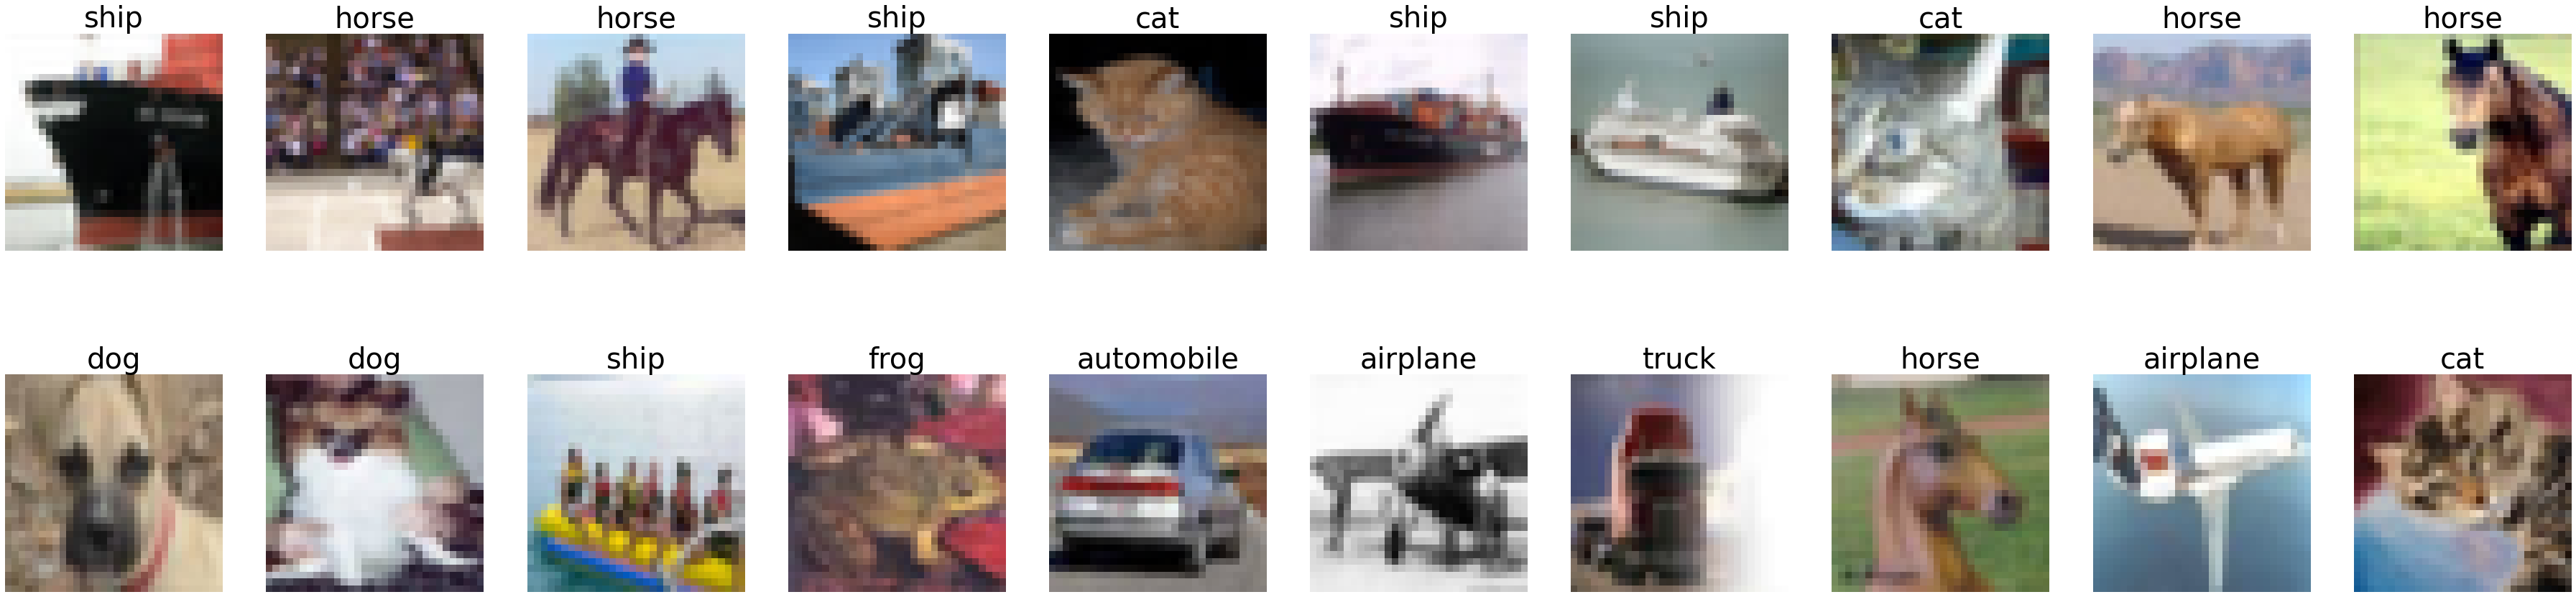

For validation set: 


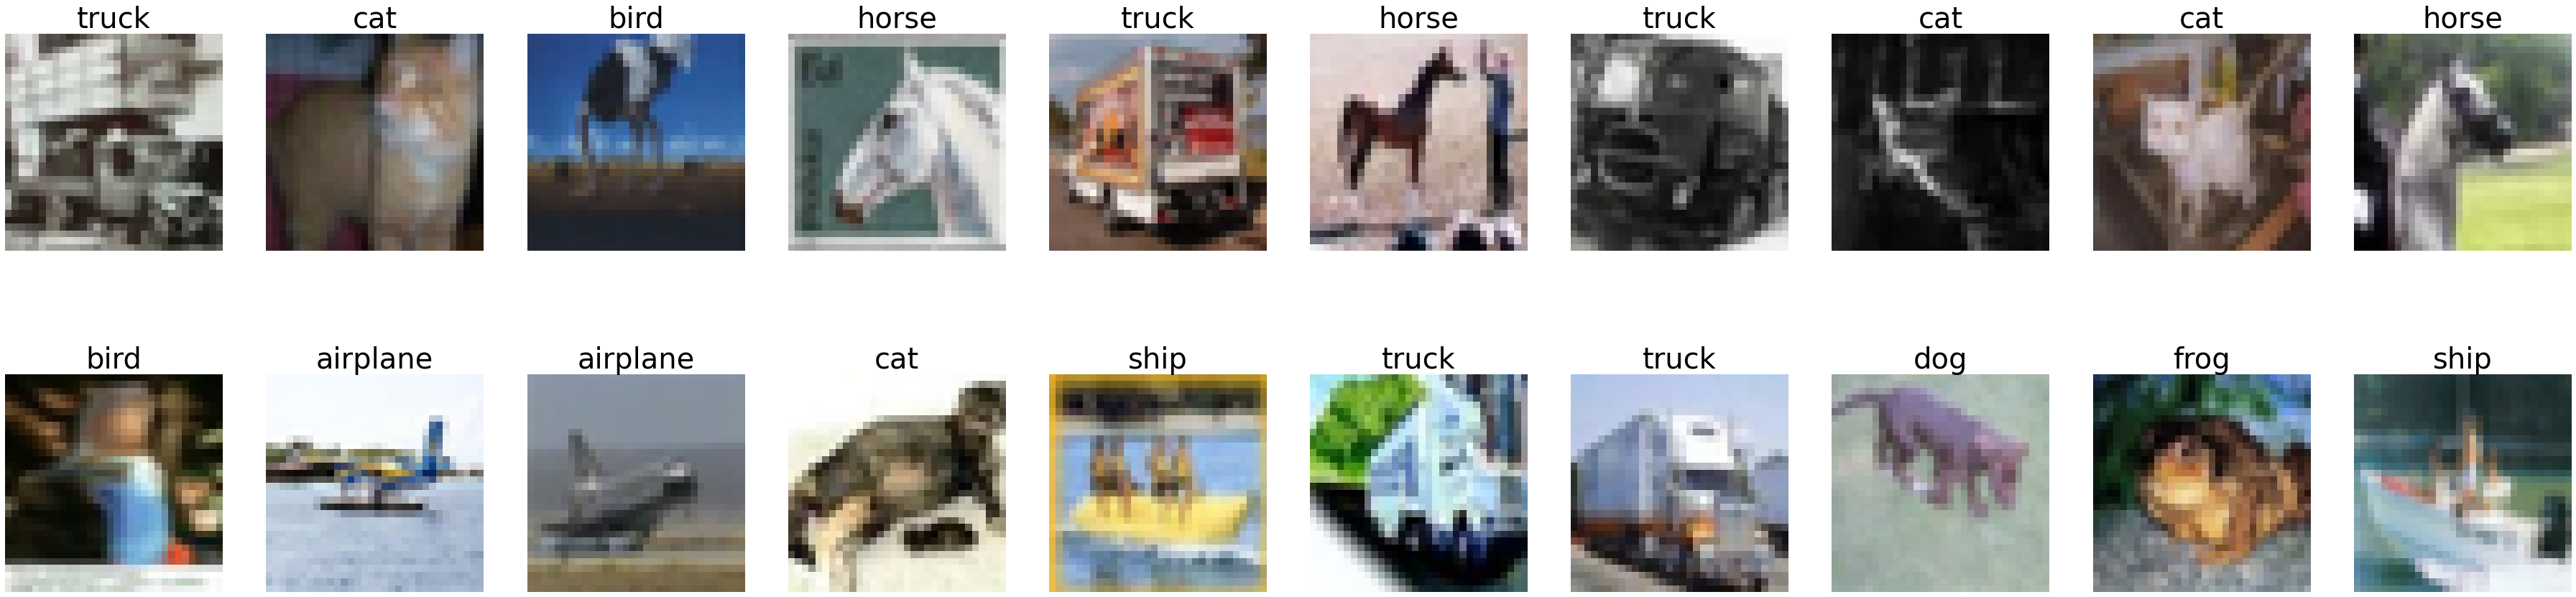

For test set: 


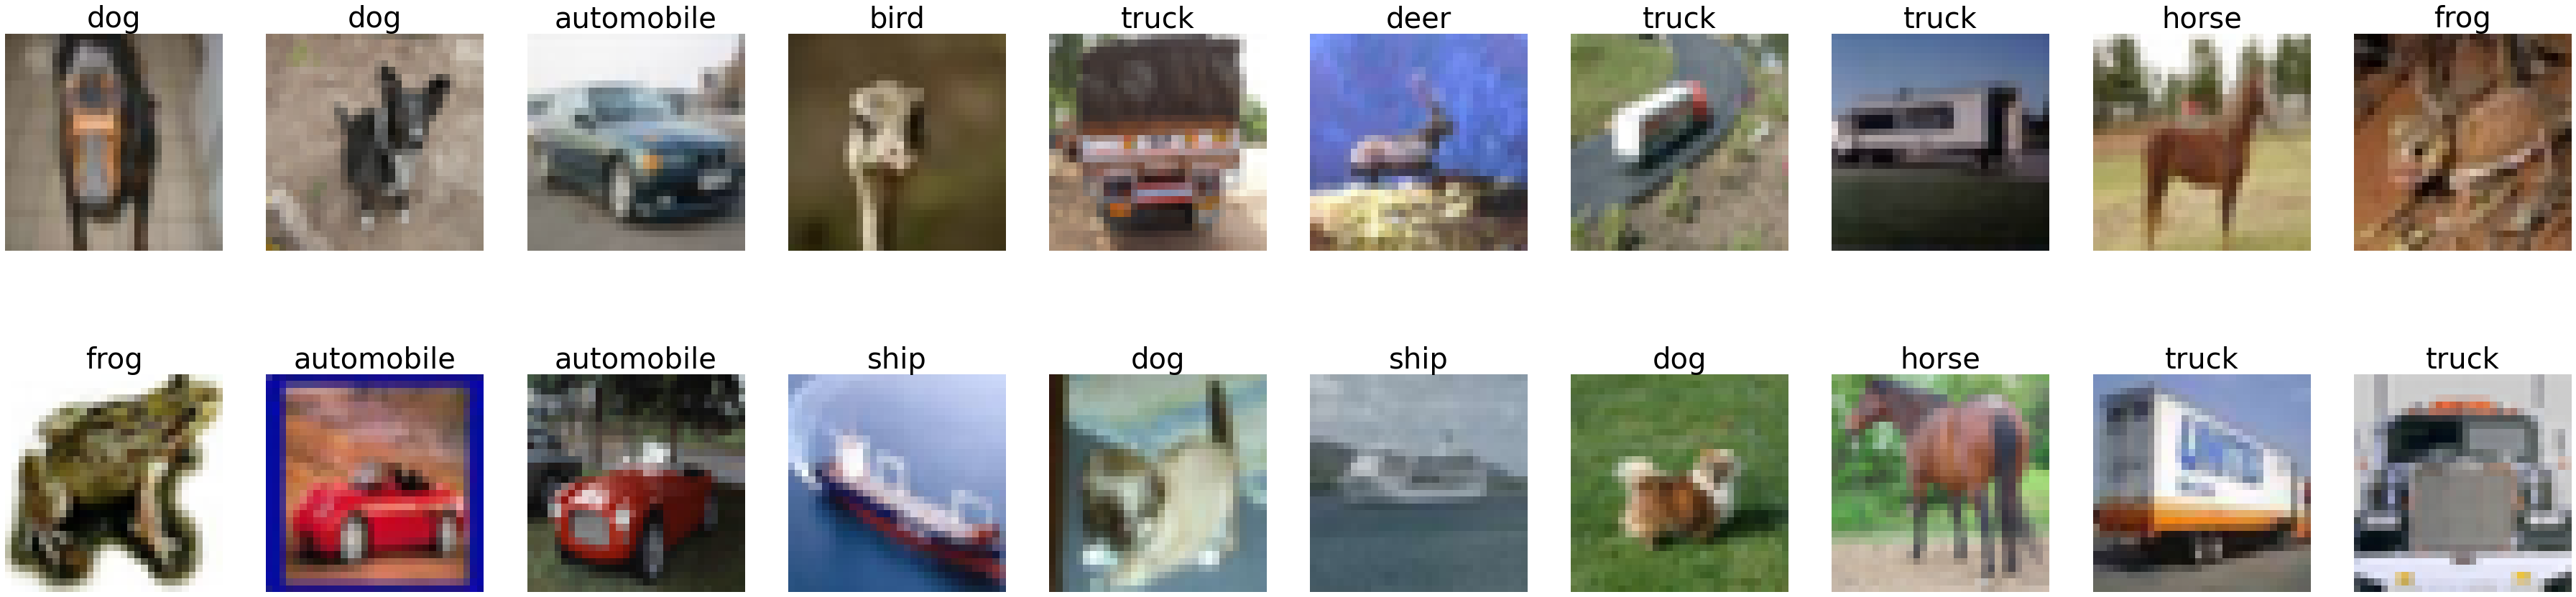

In [10]:
def displaySampleImage(x_set,y_set):
    plt.figure(figsize=(64,16))
    nameList=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
    rdIndex=random.sample(range(0,len(x_set)-1),20)
    plotNum=0
    for i in rdIndex:
        plt.subplot(2,10,plotNum+1)
        plt.axis('off')
        plt.title(nameList[y_set[i]],fontsize=40)
        plt.imshow(x_set[i])
        plotNum=plotNum+1
    plt.show()

print("For train set: ")
displaySampleImage(x_train,y_train)
print("For validation set: ")
displaySampleImage(x_validation,y_validation)
print("For test set: ")
displaySampleImage(X_test,y_test)


In [11]:
classifier = MLPClassifier(solver='lbfgs', activation='logistic', 
                           hidden_layer_sizes=(3, ), random_state=20)

In [12]:
tf.__version__
keras.__version__

'2.8.0'

In [13]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32,32,3]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(200,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))# 1 neurons per class, total 10 classes
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 300)               921900    
                                                                 
 dense_1 (Dense)             (None, 200)               60200     
                                                                 
 dense_2 (Dense)             (None, 100)               20100     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 1,003,210
Trainable params: 1,003,210
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"])

In [15]:
print("sb")

sb


In [20]:
best_acc=0
for drop_out in [0.2,0.5,0.8]:
  for init in ["random_normal","random_uniform","variance_scaling"]:
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=[32,32,3]))
    model.add(keras.layers.Dense(300,activation="relu"))
    model.add(keras.layers.Dropout(drop_out))
    model.add(keras.layers.Dense(200,activation="relu"))
    model.add(keras.layers.Dropout(drop_out))
    model.add(keras.layers.Dense(100,activation="relu"))
    model.add(keras.layers.Dropout(drop_out))
    model.add(keras.layers.Dense(10,activation="softmax"))# 1 neurons per class, total 10 classes
    model.compile(loss="sparse_categorical_crossentropy",
          optimizer="sgd",
          metrics=["accuracy"])
    model.fit(x_train,y_train,epochs=50,validation_data=(x_validation,y_validation),
          callbacks=[EarlyStopping(
              patience=10,
              min_delta=0.05,
              baseline=0.2,
              mode='max',
              monitor='val_accuracy',
              restore_best_weights=True,
              verbose=1)])
    scores=model.evaluate(X_test,y_test)
    if scores[1]>best_acc:
      best_acc=scores[1]
      best_loss=scores[0]
      best_para={'drop_out':drop_out,'init':init}
print(best_acc)
print(best_loss)
print(best_para)

Epoch 1/50
1329/1329 [==============================] - 5s 4ms/step - loss: 2.0416 - accuracy: 0.2481 - val_loss: 1.8763 - val_accuracy: 0.3169
Epoch 2/50
1329/1329 [==============================] - 4s 3ms/step - loss: 1.8622 - accuracy: 0.3278 - val_loss: 1.8070 - val_accuracy: 0.3451
Epoch 3/50
1329/1329 [==============================] - 4s 3ms/step - loss: 1.7938 - accuracy: 0.3560 - val_loss: 1.9562 - val_accuracy: 0.3037
Epoch 4/50
1329/1329 [==============================] - 4s 3ms/step - loss: 1.7468 - accuracy: 0.3729 - val_loss: 1.6673 - val_accuracy: 0.4048
Epoch 5/50
1329/1329 [==============================] - 4s 3ms/step - loss: 1.7063 - accuracy: 0.3883 - val_loss: 1.6656 - val_accuracy: 0.3957
Epoch 6/50
1329/1329 [==============================] - 4s 3ms/step - loss: 1.6767 - accuracy: 0.4018 - val_loss: 1.6708 - val_accuracy: 0.3988
Epoch 7/50
1329/1329 [==============================] - 4s 3ms/step - loss: 1.6479 - accuracy: 0.4123 - val_loss: 1.6604 - val_accuracy:

In [21]:
#history=model.fit(x_train,y_train,epochs=100,validation_data=(x_validation,y_validation))

In [22]:
#pd.DataFrame(history.history).plot(figsize=(8,5))
#plt.grid(True)
#plt.gca().set_ylim(0,1)
#plt.show()

In [23]:
#scores=model.evaluate(X_test,y_test)
#print('test loss',scores[0])
#print('test accuracy',scores[1])

In [24]:
#model.save("mlp_keras_model")
#model=keras.models.load_model("mlp_keras_model")

In [25]:
model= keras.models.Sequential([
    keras.layers.Conv2D(64,7,activation="relu",padding="same",input_shape=[32,32,3]),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(128,3,activation="relu",padding="same"),
    keras.layers.Conv2D(128,3,activation="relu",padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(256,3,activation="relu",padding="same"),
    keras.layers.Conv2D(256,3,activation="relu",padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64,activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10,activation="softmax"),
])
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        9472      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 256)       

In [26]:
model.compile(loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"])

In [27]:
best_acc=0
for k_size in [3,5,7]:
  for active in ["relu","sigmoid","linear"]:
    model= keras.models.Sequential([
    keras.layers.Conv2D(64,7,activation=active,padding="same",input_shape=[32,32,3]),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(128,k_size,activation=active,padding="same"),
    keras.layers.Conv2D(128,k_size,activation=active,padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(256,k_size,activation=active,padding="same"),
    keras.layers.Conv2D(256,k_size,activation=active,padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation=active),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64,activation=active),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10,activation="softmax"),
    ])
    model.compile(loss="sparse_categorical_crossentropy",
          optimizer="sgd",
          metrics=["accuracy"])
    model.fit(x_train,y_train,epochs=50,validation_data=(x_validation,y_validation),callbacks=[EarlyStopping(
              patience=10,
              min_delta=0.05,
              baseline=0.2,
              mode='max',
              monitor='val_accuracy',
              restore_best_weights=True,
              verbose=1)])
    scores=model.evaluate(X_test,y_test)
    if scores[1]>best_acc:
      best_acc=scores[1]
      best_loss=scores[0]
      best_para={'k_size':k_size,'active':active}
print(best_acc)
print(best_loss)
print(best_para)

Epoch 1/50
1329/1329 [==============================] - 20s 9ms/step - loss: 2.2164 - accuracy: 0.1639 - val_loss: 2.0287 - val_accuracy: 0.2623
Epoch 2/50
1329/1329 [==============================] - 11s 8ms/step - loss: 2.0167 - accuracy: 0.2440 - val_loss: 2.0182 - val_accuracy: 0.2780
Epoch 3/50
1329/1329 [==============================] - 11s 8ms/step - loss: 1.8630 - accuracy: 0.3115 - val_loss: 1.8162 - val_accuracy: 0.3175
Epoch 4/50
1329/1329 [==============================] - 10s 8ms/step - loss: 1.7398 - accuracy: 0.3579 - val_loss: 1.6083 - val_accuracy: 0.4136
Epoch 5/50
1329/1329 [==============================] - 11s 8ms/step - loss: 1.6423 - accuracy: 0.3982 - val_loss: 1.6412 - val_accuracy: 0.3987
Epoch 6/50
1329/1329 [==============================] - 10s 8ms/step - loss: 1.5686 - accuracy: 0.4308 - val_loss: 1.5914 - val_accuracy: 0.4456
Epoch 7/50
1329/1329 [==============================] - 10s 8ms/step - loss: 1.4990 - accuracy: 0.4590 - val_loss: 1.5779 - val_ac

In [28]:
#history=model.fit(x_train,y_train,epochs=100,validation_data=(x_validation,y_validation))

In [29]:
#model.evaluate(X_test,y_test)